In [1]:
import json 
import pandas as pd
from urllib.request import urlopen
from disCap import finmod as FM
from disCap import disCap
import matplotlib.pyplot as plt
import numpy as np

'''
financialmodelingprep ask that the API key not be shared.  I keep mine in a json
file.  The API key is available and free for use provided by registration at 
the site, it is to not be shared or left in git. 
'''
api_key = None
with open('../../.credentials/credentials.json') as f:
  api_keys = json.load(f)
api_key = api_keys['fiancialmod']

In [2]:
symbols = ['ETHUSD','TMUS','AMD', 'AMT']
dfx = FM.portfolio_data(symbols, api_key)
dfx.head(10)

Reading ETHUSD and writing to archive
Symbol: ETHUSD.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading TMUS and writing to archive
Symbol: TMUS.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading AMD and writing to archive
Symbol: AMD.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading AMT and writing to archive
Symbol: AMT.  Keys: dict_keys(['symbol', 'historical'])
continue...



,symbol,close,prev_close,maxmed10,maxmed30,maxmed60,maxmed120,maxmed240
0,ETHUSD,1998.612061,1926.993652,1832.859314,1823.449341,1843.532593,1357.058105,592.838257
1,TMUS,127.650000,125.290001,123.480003,126.309998,128.894996,133.000000,132.419998
2,AMD,81.090000,78.500000,77.139999,81.400002,90.910004,94.070000,89.909999
3,AMT,240.060000,239.059998,237.985001,222.674996,232.889999,227.909997,254.349998


In [3]:
with open('data/stock_description.json') as f:
  stock_description = json.load(f)

with open('data/investments.json') as f:
  investments = json.load(f)

stock_description_df = FM.stockDescriptionAs_df(stock_description)
investments_df, todays_df = FM.investmentsAs_df(investments)

symbols = stock_description.keys()

dfx = FM.portfolio_data(symbols, api_key)
dfx['rho'] = dfx['close']/dfx['maxmed30']
dfx = dfx.sort_values(by=['rho'], ascending=False)

todays_df = todays_df.merge(dfx, how='left', on='symbol')
todays_df['value'] =  todays_df['close'] * todays_df['shares'] 
todays_df['gain'] =  todays_df['value']/todays_df['invested']

Pulling data from data/arc/20210402/AMD.json for today: AMD
Symbol: AMD.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading PYPL and writing to archive
Symbol: PYPL.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading OKTA and writing to archive
Symbol: OKTA.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading AMZN and writing to archive
Symbol: AMZN.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading APPN and writing to archive
Symbol: APPN.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading WORK and writing to archive
Symbol: WORK.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading ALB and writing to archive
Symbol: ALB.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading ADBE and writing to archive
Symbol: ADBE.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading ESTC and writing to archive
Symbol: ESTC.  Keys: dict_keys(['symbol', 'historical'])
continue...

Reading GOOGL and writing

In [4]:
total_invested, total_value = sum(todays_df.invested), sum(todays_df.value)
todays_df = todays_df.merge( stock_description_df, on='symbol',how='left')
todays_df['prc_value'] = 100* ( todays_df['value']/total_value )
todays_df['prc_invested'] = 100 * (todays_df['invested']/total_value )
todays_df['basis'] = todays_df['invested']/todays_df['shares']

Red at gain = 0.7987756671999999.
Changes linear to yellow at 1.0.
From 1.0 to 3.073529547 is green blue shift


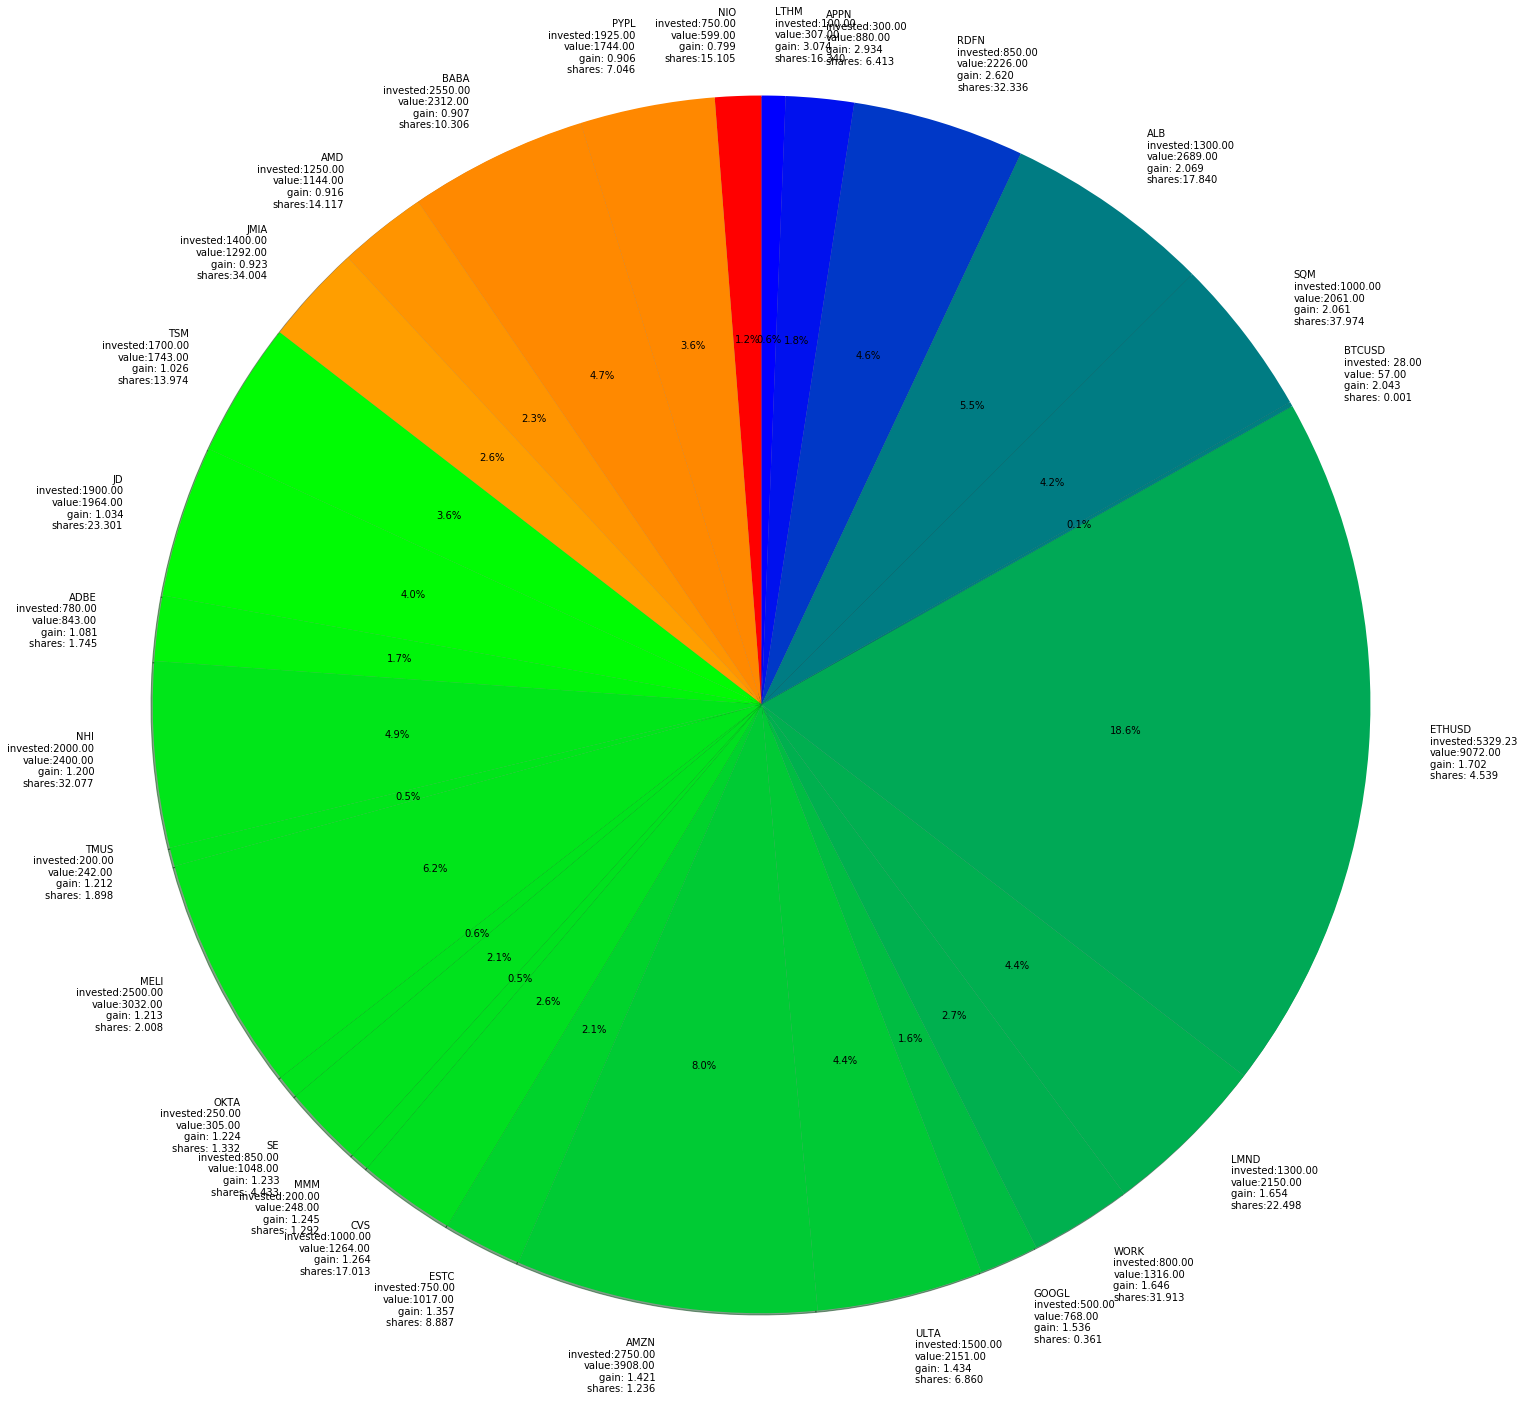



Total Invested:		35762.23
Total Value:		48794.92
Total Gain %:		  1.36


In [5]:
fig1, ax1 = plt.subplots()
todays_df = todays_df.sort_values(by=['gain'])
# rgb_gain(df.gain,0.8,0.95,2)
red_point = min( min(todays_df.gain), 0.95)
blue_point = max( max(todays_df.gain), 3)
green_point = 1.00

red_point = min(todays_df.gain)
blue_point = max(todays_df.gain)
#green_point = np.median( df.gain )

print('Red at gain = {}.\nChanges linear to yellow at {}.\nFrom {} to {} is green blue shift'.\
      format(red_point, green_point, green_point, blue_point))

label_ = list( map( disCap.mklab, todays_df.symbol, \
                   todays_df.invested, todays_df.value, todays_df.gain, todays_df.shares) )
ax1.pie(todays_df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(todays_df.gain,red_point,green_point,blue_point) )

plt.show()



print('\n\nTotal Invested:\t\t{0:6.2f}\nTotal Value:\t\t{1:6.2f}\nTotal Gain %:\t\t{2:6.2f}'.\
      format(total_invested, total_value, total_value/total_invested))

In [7]:
fields = ['symbol','gain','close','basis','shares','invested','value','prc_invested','prc_value','first_investment','last_investment'\
         ,'prev_close','maxmed30','rho']



fields = ['symbol','prc_value','sector','gain','close','basis','shares','invested','value','first_investment','last_investment'\
         ,'prev_close','maxmed30','rho']
todays_df[fields].head(40)

,symbol,prc_value,sector,gain,close,basis,shares,invested,value,first_investment,last_investment,prev_close,maxmed30,rho
18,NIO,1.227754,Electric Vehicle,0.798776,39.660000,49.650987,15.105440,750.00,599.081750,2020.11.09,2021.01.07,38.980000,44.219999,0.896879
20,PYPL,3.574586,"Tech, Fintech",0.906086,247.540000,273.196900,7.046200,1925.00,1744.216348,2021.02.15,2021.03.05,242.839996,249.644997,0.991568
5,BABA,4.738530,"Virtual Marketplace, Cloud Services",0.906730,224.360000,247.438526,10.305590,2550.00,2312.162172,2020.11.27,2020.12.29,226.729996,235.364998,0.953243
2,AMD,2.346080,"Tech, Semiconductors",0.915814,81.090000,88.544157,14.117250,1250.00,1144.767803,2021.02.16,2021.03.09,78.500000,81.400002,0.996192
12,JMIA,2.648810,"Virtual Marketplace, Cloud Services",0.923203,38.010000,41.171857,34.003810,1400.00,1292.484818,2020.12.21,2021.03.09,35.459999,48.044998,0.791133
25,TSM,3.574140,"Tech, Semiconductors",1.025882,124.800000,121.651454,13.974350,1700.00,1743.998880,2021.02.18,2021.03.31,118.279999,118.760002,1.050859
11,JD,4.026052,"Virtual Marketplace, Cloud Services",1.033952,84.310000,81.541495,23.301020,1900.00,1964.508996,2020.10.16,2020.12.28,84.330002,90.075001,0.935998
0,ADBE,1.728725,"Tech, Creative",1.081448,483.340000,446.937618,1.745210,780.00,843.529801,2020.06.05,2021.01.05,475.369995,449.065002,1.076325
17,NHI,4.920517,REIT,1.200481,74.850000,62.349990,32.076990,2000.00,2400.962702,2020.08.05,2020.08.05,72.279999,75.760002,0.987988
24,TMUS,0.496579,Cellular,1.211526,127.650000,105.362975,1.898200,200.00,242.305230,2020.07.07,2020.07.22,125.290001,126.309998,1.010609


In [ ]:
todays_df = todays_df.sort_values(by=['rho'])
fields = ['symbol','sector','gain','close','basis','rho','shares','invested','value','first_investment','last_investment'\
         ,'prev_close','maxmed30']
todays_df[fields].head(40)

In [8]:
todays_df = todays_df.sort_values(by=['prc_value'])
todays_df[fields].head(40)

,symbol,prc_value,sector,gain,close,basis,shares,invested,value,first_investment,last_investment,prev_close,maxmed30,rho
6,BTCUSD,0.117235,cryptocurrency,2.043030,60145.339844,29439.286728,0.000951,28.00,57.204834,2021.01.02,2021.01.29,59326.921875,57858.921875,1.039517
24,TMUS,0.496579,Cellular,1.211526,127.650000,105.362975,1.898200,200.00,242.305230,2020.07.07,2020.07.22,125.290001,126.309998,1.010609
16,MMM,0.510167,Industrial,1.244678,192.700000,154.819133,1.291830,200.00,248.935641,2020.07.07,2020.07.07,192.679993,189.090004,1.019091
19,OKTA,0.626996,"Tech, Security",1.223768,229.700000,187.698961,1.331920,250.00,305.942024,2020.05.20,2020.05.20,220.429993,226.610001,1.013636
14,LTHM,0.629887,"Li Mining, Specialty Chemicals, Battery",3.073530,18.810000,6.120000,16.339870,100.00,307.352955,2020.03.11,2020.03.11,17.320000,18.430000,1.020619
18,NIO,1.227754,Electric Vehicle,0.798776,39.660000,49.650987,15.105440,750.00,599.081750,2020.11.09,2021.01.07,38.980000,44.219999,0.896879
10,GOOGL,1.574237,"Tech, ecclectic",1.536296,2129.780000,1386.308814,0.360670,500.00,768.147753,2020.02.28,2020.02.28,2062.520020,2052.219971,1.037793
0,ADBE,1.728725,"Tech, Creative",1.081448,483.340000,446.937618,1.745210,780.00,843.529801,2020.06.05,2021.01.05,475.369995,449.065002,1.076325
4,APPN,1.804107,"Tech, Business Processes",2.934375,137.270000,46.779978,6.413000,300.00,880.312510,2020.02.22,2020.02.22,132.949997,167.169998,0.821140
8,ESTC,2.085881,"Tech, DB",1.357072,114.530000,84.394928,8.886790,750.00,1017.804059,2020.04.21,2020.09.22,111.199997,118.694999,0.964910


In [ ]:
dfx = todays_df

sector_df = dfx[['sector','invested','value']].groupby('sector').agg('sum').reset_index()
total = sum( sector_df['value'] )
sector_df['gain'] = sector_df['value']/sector_df['invested']
sector_df['percentage_value'] = 100.00*sector_df['value']/total

area_df = dfx[['area','invested','value']].groupby('area').agg('sum').reset_index()
total = sum( area_df['value'] )
area_df['gain'] = area_df['value']/area_df['invested']
area_df['percentage_value'] = 100*area_df['value']/total

In [ ]:
fig1, ax1 = plt.subplots()
df = sector_df
df = df.sort_values(by=['gain'])

label_ = list( map( disCap.mklab, df.sector, df.invested, df.value, df.gain, df.gain) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

In [ ]:
df.sort_values(by=['percentage_value']).head(20)

In [ ]:
fig1, ax1 = plt.subplots()
df = area_df
df = df.sort_values(by=['gain'])

red_point = min(df.gain)
blue_point = max(df.gain)
green_point = np.median( df.gain )

label_ = list( map( disCap.mklab, df.area, df.invested, df.value, df.gain, df.gain) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

In [ ]:
todays_df = todays_df.sort_values(by=['last_investment'])
todays_df[fields].head(40)